In [1]:
import os
from collections import defaultdict
import pandas as pd
import logging
import numpy as np
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
from csst.experiment import Experiment
from csst.analyzer import Analyzer, plotter
import seaborn as sns
font = {"size": 12}
matplotlib.rc("font", **font)
save_folder = Path('.')

In [2]:
folder = Path("..") / 'data'

for f in folder.glob('**/*.csv'):
    if 'AM-1 Octanol- PE-Nylon 12-mPEG-Dextran.csv' in str(f):
        print(f)
        exp = Experiment.load_from_file(f)

../data/Mixed tests/AM-1 Octanol- PE-Nylon 12-mPEG-Dextran.csv


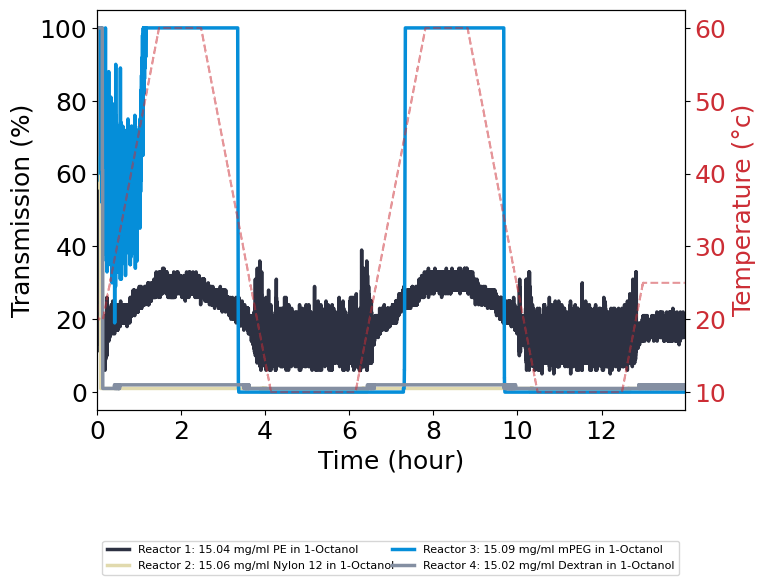

In [3]:
fig = plotter.plot_experiment(exp)

In [4]:
a1 = Analyzer()
a1.add_experiment_reactors(exp, 1)

In [5]:
a1.df

,reactor,polymer,solvent,concentration,concentration_unit,temperature_unit,average_temperature,temperature_range,average_transmission,median_transmission,transmission_std,heating,cooling,holding,filtered,transmission_unit
0,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,10.0,1.0,13.693069,13.000000,3.522889e+00,1,0,0,False,%
1,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,10.0,1.0,13.668098,13.814159,3.693220e-01,1,0,0,True,%
2,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,10.0,1.0,13.096774,13.000000,3.407975e+00,0,1,0,False,%
3,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,10.0,1.0,13.186412,12.929204,3.708985e-01,0,1,0,True,%
4,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,10.0,1.0,13.368662,13.000000,3.104141e+00,0,0,1,False,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,Reactor 4: 15.02 mg/ml Dextran in 1-Octanol,Dextran,1-Octanol,15.02,mg/ml,°C,60.0,1.0,2.000000,2.000000,4.440892e-16,1,0,0,True,%
208,Reactor 4: 15.02 mg/ml Dextran in 1-Octanol,Dextran,1-Octanol,15.02,mg/ml,°C,60.0,1.0,2.000000,2.000000,0.000000e+00,0,1,0,False,%
209,Reactor 4: 15.02 mg/ml Dextran in 1-Octanol,Dextran,1-Octanol,15.02,mg/ml,°C,60.0,1.0,2.000000,2.000000,4.440892e-16,0,1,0,True,%
210,Reactor 4: 15.02 mg/ml Dextran in 1-Octanol,Dextran,1-Octanol,15.02,mg/ml,°C,60.0,1.0,2.000000,2.000000,0.000000e+00,0,0,1,False,%


In [6]:
df = a1.unprocessed_df
df = df.loc[df.reactor.str.contains("Reactor 1")]
df

,reactor,polymer,solvent,concentration,concentration_unit,temperature_unit,temperature,transmission,filtered_transmission,set_temperature,time,time_unit,stir_rate,stir_rate_unit,bottom_stir_rate,bottom_stir_rate_unit,top_stir_rate,top_stir_rate_unit,ramp_state,transmission_unit
0,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,25.1,57,123.162087,25.1,0.000000,hour,0,rpm,900.0,rpm,NaN,NaN,holding,%
1,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,25.1,57,122.335867,25.1,0.000278,hour,0,rpm,900.0,rpm,NaN,NaN,holding,%
2,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,25.1,100,121.509648,24.7,0.000556,hour,0,rpm,900.0,rpm,NaN,NaN,holding,%
3,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,25.1,100,120.683429,24.4,0.000833,hour,0,rpm,900.0,rpm,NaN,NaN,cooling,%
4,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,25.1,100,119.857209,24.1,0.001111,hour,0,rpm,900.0,rpm,NaN,NaN,holding,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47405,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,25.0,19,17.738572,25.0,13.979444,hour,0,rpm,900.0,rpm,NaN,NaN,holding,%
47406,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,25.0,17,17.738140,25.0,13.979722,hour,0,rpm,900.0,rpm,NaN,NaN,holding,%
47407,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,25.0,16,17.737707,25.0,13.980000,hour,0,rpm,900.0,rpm,NaN,NaN,holding,%
47408,Reactor 1: 15.04 mg/ml PE in 1-Octanol,PE,1-Octanol,15.04,mg/ml,°C,25.0,17,17.737275,25.0,13.980278,hour,0,rpm,900.0,rpm,NaN,NaN,holding,%


Text(0.5, 1.0, '15.04 mg/ml PE in 1-Octanol')

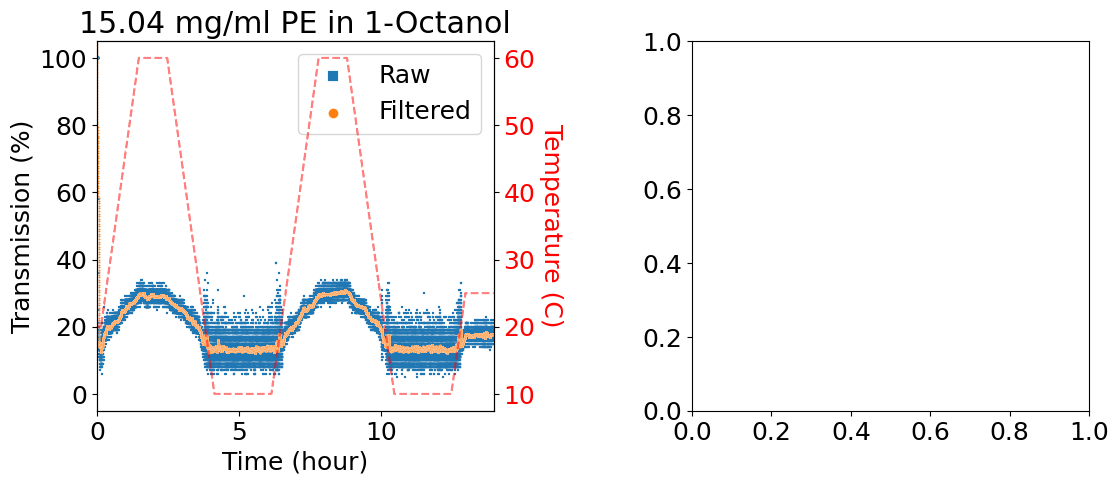

In [7]:
plt.close('all')
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(2*6.4, 1*4.8))
plt.subplots_adjust(wspace=0.5)
ax = axes[0]
ax2 = ax.twinx()
ax2.set_ylabel('Temperature (C)', color='r', rotation=270, labelpad=20, fontsize=18)
ax2.tick_params(axis="y", labelcolor='r')
ax2.plot(df.time, df.temperature, c='r', alpha=0.5, linestyle='--')
sns.scatterplot(data=df, y='transmission', x='time', s=2, ax=ax, marker='s', edgecolor=None, label='Raw')
sns.scatterplot(data=df, y='filtered_transmission', x='time', s=2, ax=ax, label='Filtered')
ax.set_ylabel('Transmission (%)', fontsize=18)
ax.set_xlabel('Time (hour)', fontsize=18)
ax.set_ylim([-5, 105])
ax.legend(markerscale=5)
ax.set_xlim([df.time.min(), df.time.max()])
ax.set_title('15.04 mg/ml PE in 1-Octanol')

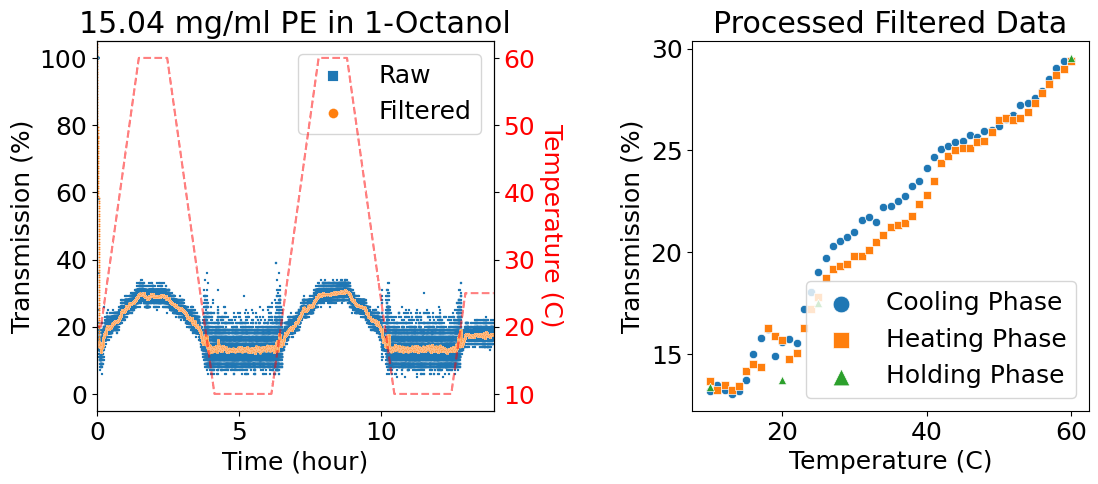

In [8]:
ax = axes[1]

df = a1.df
df = df.loc[df.reactor.str.contains("Reactor 1")]


markers = ['o', 's', '^']
for i, state in enumerate(['cooling', 'heating', 'holding']):
    tdf = df.loc[(df[state] == 1) & (df.filtered)]
    sns.scatterplot(data=tdf, x='average_temperature', y='average_transmission', marker=markers[i], label=f"{state.capitalize()} Phase", ax=ax)
ax.set_xlabel('Temperature (C)', fontsize=18)
ax.legend(markerscale=2)
ax.set_ylabel('Transmission (%)', fontsize=18)
ax.set_title('Processed Filtered Data')
fig